# HW8 - Regression
## Ali Hashir - ah05433@st.habib.edu.pk

In [1]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('EmployeeSalaryRegression.csv')

In [3]:
df

,Age,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobLevel,JobRole,MaritalStatus,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome
0,41,Sales,1,2,Life Sciences,Female,94,2,Sales Executive,Single,...,3,0,8,0,1,6,4,0,5,5993
1,49,Research & Development,8,1,Life Sciences,Male,61,2,Research Scientist,Married,...,4,1,10,3,3,10,7,1,7,5130
2,37,Research & Development,2,2,Other,Male,92,1,Laboratory Technician,Single,...,3,0,7,3,3,0,0,0,0,2090
3,33,Research & Development,3,4,Life Sciences,Female,56,1,Research Scientist,Married,...,3,0,8,3,3,8,7,3,0,2909
4,27,Research & Development,2,1,Medical,Male,40,1,Laboratory Technician,Married,...,3,1,6,3,3,2,2,2,2,3468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,2,Medical,Male,41,2,Laboratory Technician,Married,...,3,1,17,3,3,5,2,0,3,2571
1466,39,Research & Development,6,1,Medical,Male,42,3,Healthcare Representative,Married,...,3,1,9,5,3,7,7,1,7,9991
1467,27,Research & Development,4,3,Life Sciences,Male,87,2,Manufacturing Director,Married,...,4,1,6,0,3,6,2,0,3,6142
1468,49,Sales,2,3,Medical,Male,63,2,Sales Executive,Married,...,3,0,17,3,2,9,6,0,8,5390


### Part 1

In [4]:
X1 = df['TotalWorkingYears']
Y1 = df['MonthlyIncome']

In [5]:
X1

0        8
1       10
2        7
3        8
4        6
        ..
1465    17
1466     9
1467     6
1468    17
1469     6
Name: TotalWorkingYears, Length: 1470, dtype: int64

In [6]:
Y1

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

### Simple Linear Regression between total working years and monthly income

Need to add constant everytime with your input. The reason for this is that it takes care of the bias in the data (a constant difference which is there for all observations).

In [7]:
X1 = sm.add_constant(X1)

In [8]:
X1

,const,TotalWorkingYears
0,1.0,8
1,1.0,10
2,1.0,7
3,1.0,8
4,1.0,6
...,...,...
1465,1.0,17
1466,1.0,9
1467,1.0,6
1468,1.0,17


In [9]:
model1 = sm.OLS(Y1,X1).fit()

In [10]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2178.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.73e-292
Time:                        14:24:43   Log-Likelihood:                -13848.
No. Observations:                1470   AIC:                         2.770e+04
Df Residuals:                    1468   BIC:                         2.771e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1227.9353    137.299      8.944      0.000     958.612    1497.259
TotalWorkingYears   467.6584     10.021     46.669      0.000     448.002     487.315
==============================================================================
Omnibus:                       47.473   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.304
Skew:                           0.269   Prob(JB):                     6.02e-18
Kurtosis:                       4.003   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The p-value of the independent variable i.e. TotalWorkingHours is 0.00 which is less than 0.05 hence this is a significant variable in determing the Monthly Income.
#### The R-squared value is slightly above 0.5 which means that the given model is not very good but can also not be disregarded completely. The variable TotalWorkingHours alone can be used but may not be able to give the best results for predicting the Monthly Income of employees.  
#### The coefficient of X is 467.66 which shows that with every 1 unit increase in TotalWorkingHours, the Monthly Income increases by 467.66 units. The more the working hours of an employee, the more he is able to earn. With each 1 unit increase in working hour, the employee can earn 467.66 units more.

Text(0, 0.5, 'MonthlyIncome')

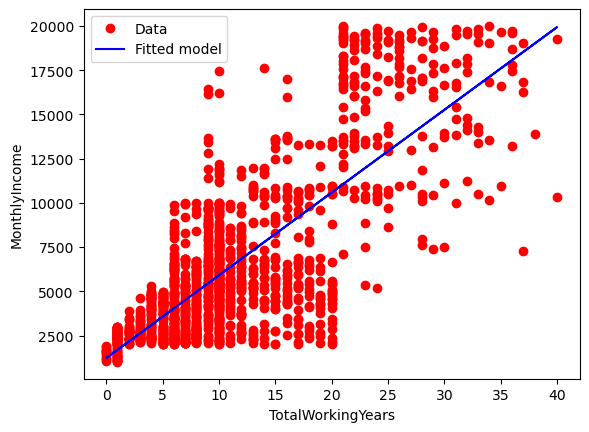

In [11]:
plt.plot(df['TotalWorkingYears'],df['MonthlyIncome'],'ro')
plt.plot(df['TotalWorkingYears'],model1.fittedvalues,  'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')

#### We can see from the plot above that the regression line is increasing that shows the overall increase in Monthly Income with increase in TotalWorkingHours but it is also clear that the points are scattered and the model does not fit perfectly to the points (which we have also seen from the R-squared value above) so it is a reasonable but not very good measure for prediction.

### Part 2

In [12]:
X2 = df['Age']
Y2 = df['DistanceFromHome']

In [13]:
X2 = sm.add_constant(X2)

In [14]:
X2

,const,Age
0,1.0,41
1,1.0,49
2,1.0,37
3,1.0,33
4,1.0,27
...,...,...
1465,1.0,36
1466,1.0,39
1467,1.0,27
1468,1.0,49


In [15]:
model2 = sm.OLS(Y2,X2).fit()

In [16]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       DistanceFromHome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.004174
Date:                Wed, 15 Mar 2023   Prob (F-statistic):              0.948
Time:                        14:25:04   Log-Likelihood:                -5161.6
No. Observations:                1470   AIC:                         1.033e+04
Df Residuals:                    1468   BIC:                         1.034e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2478      0.881     10.497      0.000       7.520      10.976
Age           -0.0015      0.023     -0.065      0.948      -0.047       0.044
==============================================================================
Omnibus:                      168.749   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.762
Skew:                           0.957   Prob(JB):                     3.48e-50
Kurtosis:                       2.773   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The p-value of the independent variable i.e. Age is 0.948 which is greater than 0.05 hence Age is not a significant variable in determing Distance from home for employees.
#### The R-squared value is just 0 which means that the given model is bad. The variable Age does not have any relationship with Distance from home so it can not be used to predict distance from age.  
#### The coefficient of X is -0.0015 which shows that with every 1 unit increase in Age, the distance from home of employees decreases by 0.0015 units. But as suggested by the p-value and R-squared value, the two variables do not have any association, this relationship can not be used to infer distance from home using the variable Age.

Text(0, 0.5, 'DistanceFromHome')

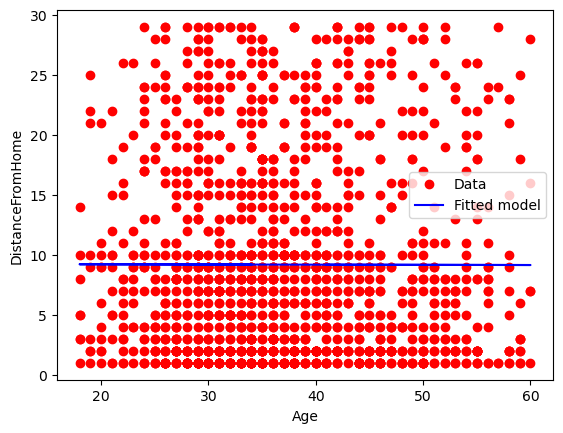

In [17]:
plt.plot(df['Age'],df['DistanceFromHome'],'ro')
plt.plot(df['Age'],model2.fittedvalues,  'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('Age')
plt.ylabel('DistanceFromHome')

#### The regression line is just a straight line indicating no relationship between the two plotted variables (age and distance from home). The plot is also very scattered and it is clear from the above values as well as the scatter plot that it is not a good model for prediction of distances from given age. As age of employees can not determine how far he lives. 

### Part 3

In [18]:
corr1 = np.sqrt(model1.rsquared)
corr1

0.7728932462543561

#### The correlation value of part 1 is 0.773 i.e. close to 1 which shows a positive correlation and association among the variables. It can be inferred from this value that the Monthly Income is dependent on TotalWorkingHours and this variable can be included in predicting the Monthly Income of employees. As each hour increase will be significant in impacting the Income of employee. The correlation value gives us reason to ensure the direct relationship between these two.

In [19]:
corr2 = np.sqrt(model2.rsquared)
corr2

0.0016861201481660345

#### The correlation value of part 2 is 0.0017 i.e. very small, almost 0. Thus the two variables (Age and distance from home) are not at all related and Age does not impact any change in distance from home. The negative correlation between these two tells that Age can not be used as a significant variable while predicting the distance from home of employees because age is not associated with the predictor in any way. 

### Part 4

### Multiple Linear Regression (all inputs)

In [20]:
df.columns

Index(['Age', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'Gender', 'HourlyRate', 'JobLevel', 'JobRole', 'MaritalStatus',
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlyIncome'],
      dtype='object')

In [21]:
#one hot encoding of categorical columns
one_hot = pd.get_dummies(df, columns=['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])

In [22]:
X3 = one_hot.drop(['MonthlyIncome'],axis=1)
Y3 = one_hot['MonthlyIncome']

In [23]:
X3 = sm.add_constant(X3)

In [24]:
X3

,const,Age,DistanceFromHome,Education,HourlyRate,JobLevel,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1.0,41,1,2,94,2,8,3,0,8,...,0,0,0,1,0,0,0,1,0,1
1,1.0,49,8,1,61,2,1,4,1,10,...,0,0,1,0,0,0,1,0,1,0
2,1.0,37,2,2,92,1,6,3,0,7,...,0,0,0,0,0,0,0,1,0,1
3,1.0,33,3,4,56,1,1,3,0,8,...,0,0,1,0,0,0,1,0,0,1
4,1.0,27,2,1,40,1,9,3,1,6,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,36,23,2,41,2,4,3,1,17,...,0,0,0,0,0,0,1,0,1,0
1466,1.0,39,6,1,42,3,4,3,1,9,...,0,0,0,0,0,0,1,0,1,0
1467,1.0,27,4,3,87,2,1,4,1,6,...,1,0,0,0,0,0,1,0,0,1
1468,1.0,49,2,3,63,2,2,3,0,17,...,0,0,0,1,0,0,1,0,1,0


In [25]:
model3 = sm.OLS(Y3,X3).fit()

In [26]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     715.9
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:25:36   Log-Likelihood:                -12394.
No. Observations:                1470   AIC:                         2.486e+04
Df Residuals:                    1435   BIC:                         2.504e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               364.2019    129.213      2.819      0.005     110.735     617.669
Age                                  -5.3357      4.614     -1.156      0.248     -14.386       3.715
DistanceFromHome                     -4.8212      3.650     -1.321      0.187     -11.981       2.339
Education                           -11.1578     29.743     -0.375      0.708     -69.502      47.186
HourlyRate                            1.3410      1.454      0.923      0.356      -1.511       4.193
JobLevel                           2759.6363     67.718     40.752      0.000    2626.800    2892.473
NumCompaniesWorked                   11.5087     13.246      0.869      0.385     -14.475      37.493
PerformanceRating                   -29.6861     81.840     -0.363      0.717    -190.225     130.853
StockOptionLevel                    -42.3557     47.499     -0.892      0.373    -135.530      50.818
TotalWorkingYears                    48.0088      8.316      5.773      0.000      31.696      64.321
TrainingTimesLastYear               -16.7479     23.135     -0.724      0.469     -62.130      28.634
WorkLifeBalance                     -22.7978     42.025     -0.542      0.588    -105.235      59.640
YearsAtCompany                        6.6563     10.392      0.641      0.522     -13.729      27.041
YearsInCurrentRole                    1.2712     13.482      0.094      0.925     -25.175      27.717
YearsSinceLastPromotion              23.3883     11.880      1.969      0.049       0.084      46.693
YearsWithCurrManager                -34.1053     13.789     -2.473      0.013     -61.154      -7.057
Department_Human Resources            9.7448    276.725      0.035      0.972    -533.084     552.574
Department_Research & Development   257.1010    170.358      1.509      0.131     -77.077     591.279
Department_Sales                     97.3561    186.808      0.521      0.602    -269.090     463.802
EducationField_Human Resources      114.4753    242.487      0.472      0.637    -361.192     590.143
EducationField_Life Sciences         38.6894     72.369      0.535      0.593    -103.270     180.649
EducationField_Marketing            104.4560    110.500      0.945      0.345    -112.303     321.215
EducationField_Medical               28.7257     76.079      0.378      0.706    -120.513     177.964
EducationField_Other                -46.9271    120.714     -0.389      0.698    -283.722     189.868
EducationField_Technical Degree     124.7826    102.199      1.221      0.222     -75.692     325.257
Gender_Female                       139.3035     72.290      1.927      0.054      -2.501     281.108
Gender_Male                         224.8984     70.391      3.195      0.001      86.818     362.979
JobRole_Healthcare Repr

#### The above model has a R-squared value of 0.944 that is quite close to 1, indicating the goodness of the model. This means that this model is quite effective in predicting the total Monthly Income of the emplyees from the given variables. 
#### Based on the p-values of each of the variables, we can extract the most significant inputs, i.e. inputs having p-values < 0.05.
#### A) Job Level: Monthly Income is directly dependent on the Job Level s.t. higher the job level, higher the monthly income. 
#### B) TotalWorkingYears: More the working years at the company, higher the Monthly Income. As the total working years increase, the monthly income is likely to increase. 
#### C) JobRole: The job role is quite an impacting factor for the Monthly Income. Higher the status of an employee, higher the role in the company, more the income he earns. This makes sense because when we think of Job roles, the manager has higher salary than any other normal working employee. 

#### The variables with p-values > 0.05 mean that they are lesser significant in deterimining the prediction. The least significant inputs for prediction of monthly income are:
#### A) YearsInCurrentRole: It has a p-value of 0.925, that is very close to 1. This shows that this variable is least significant while predicting Monthly Income of employees. That means that no matter how many years you spend in a particular role, it does not guarantee increase in monthly income. 
#### B) Education & Education Field: The monthly income received by an employee is independent by the education he/she has. Even in normal work life, it depends more on the skill and efforts that an employee puts in the company than what the educational background. Therefore education is not a good signifier fro Monthly Income
#### C) Department: The Monthly Income does not have a strong association with departments. The department of employees does not impact whatever they're earning. The p-values of all departments is > 0.05, indicating that this is an insignificant measure of prediction of Monthly Income.

In [27]:
input1 = pd.DataFrame({'const': [1.0],
                       'Age':[38],
                       'DistanceFromHome':[17],
                       'Education': [3],
                       'HourlyRate': [90],
                       'JobLevel': [2],
                       'NumCompaniesWorked':[3],
                       'PerformanceRating': [4],
                       'StockOptionLevel': [0],
                       'TotalWorkingYears':[10],
                       'TrainingTimesLastYear':[3],
                       'WorkLifeBalance':[4],
                       'YearsAtCompany': [10],
                       'YearsInCurrentRole': [2],
                       'YearsSinceLastPromotion': [2],
                       'YearsWithCurrManager':[1],
                       'Department_Human Resources': [0],
                       'Department_Research & Development': [1],
                       'Department_Sales':[0],
                       'EducationField_Human Resources':[8],
                       'EducationField_Life Sciences':[1],
                       'EducationField_Marketing': [0],
                       'EducationField_Medical': [0],
                       'EducationField_Other': [0],
                       'EducationField_Technical Degree':[0],
                       'Gender_Female': [1],
                       'Gender_Male': [0],
                       'JobRole_Healthcare Representative':[0],
                       'JobRole_Human Resources':[0],
                       'JobRole_Laboratory Technician': [0],
                       'JobRole_Manager': [0],
                       'JobRole_Manufacturing Director': [0],
                       'JobRole_Research Director':[1],
                       'JobRole_Research Scientist': [0],
                       'JobRole_Sales Executive': [0],
                       'JobRole_Sales Representative':[0],
                       'MaritalStatus_Divorced':[0],
                       'MaritalStatus_Married':[1],
                       'MaritalStatus_Single': [0],
                       'OverTime_No': [0],
                       'OverTime_Yes':[1]})

In [28]:
model3.predict(input1)

0    11120.013094
dtype: float64

#### From the above input, an employee having the above characterstics will have a monthly income of 11120.013 units according to the model prediction. This income is likely to be true in this case where the r-squared value of the model was very hight (0.944) hence this is a fairly good prediction based on the model above.

### Part 5

In [29]:
X4 = one_hot.drop(['HourlyRate'],axis=1)
Y4 = one_hot['HourlyRate']

In [30]:
X4 = sm.add_constant(X4)
X4

,const,Age,DistanceFromHome,Education,JobLevel,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1.0,41,1,2,2,8,3,0,8,0,...,0,0,0,1,0,0,0,1,0,1
1,1.0,49,8,1,2,1,4,1,10,3,...,0,0,1,0,0,0,1,0,1,0
2,1.0,37,2,2,1,6,3,0,7,3,...,0,0,0,0,0,0,0,1,0,1
3,1.0,33,3,4,1,1,3,0,8,3,...,0,0,1,0,0,0,1,0,0,1
4,1.0,27,2,1,1,9,3,1,6,3,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,36,23,2,2,4,3,1,17,3,...,0,0,0,0,0,0,1,0,1,0
1466,1.0,39,6,1,3,4,3,1,9,5,...,0,0,0,0,0,0,1,0,1,0
1467,1.0,27,4,3,2,1,4,1,6,0,...,1,0,0,0,0,0,1,0,0,1
1468,1.0,49,2,3,2,2,3,0,17,3,...,0,0,0,1,0,0,1,0,1,0


In [31]:
model4 = sm.OLS(Y4,X4).fit()

In [32]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             HourlyRate   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6846
Date:                Wed, 15 Mar 2023   Prob (F-statistic):              0.916
Time:                        14:25:56   Log-Likelihood:                -6501.3
No. Observations:                1470   AIC:                         1.307e+04
Df Residuals:                    1435   BIC:                         1.326e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                21.8033      2.281      9.560      0.000      17.329      26.277
Age                                   0.0632      0.084      0.754      0.451      -0.101       0.228
DistanceFromHome                      0.0797      0.066      1.203      0.229      -0.050       0.210
Education                             0.2087      0.540      0.386      0.699      -0.851       1.268
JobLevel                             -3.1841      1.804     -1.765      0.078      -6.722       0.354
NumCompaniesWorked                    0.1083      0.241      0.450      0.653      -0.364       0.580
PerformanceRating                    -0.3151      1.486     -0.212      0.832      -3.230       2.599
StockOptionLevel                      1.4108      0.862      1.637      0.102      -0.280       3.101
TotalWorkingYears                     0.0492      0.153      0.322      0.747      -0.250       0.349
TrainingTimesLastYear                -0.0827      0.420     -0.197      0.844      -0.907       0.741
WorkLifeBalance                       0.1144      0.763      0.150      0.881      -1.382       1.611
YearsAtCompany                        0.0478      0.189      0.253      0.800      -0.322       0.418
YearsInCurrentRole                   -0.1133      0.245     -0.463      0.643      -0.593       0.367
YearsSinceLastPromotion              -0.1686      0.216     -0.781      0.435      -0.592       0.255
YearsWithCurrManager                 -0.0090      0.251     -0.036      0.972      -0.501       0.483
MonthlyIncome                         0.0004      0.000      0.923      0.356      -0.000       0.001
Department_Human Resources            7.7458      5.020      1.543      0.123      -2.101      17.592
Department_Research & Development     6.3040      3.091      2.040      0.042       0.241      12.367
Department_Sales                      7.7535      3.386      2.290      0.022       1.112      14.395
EducationField_Human Resources       -1.5980      4.402     -0.363      0.717     -10.234       7.038
EducationField_Life Sciences          5.9413      1.305      4.554      0.000       3.382       8.500
EducationField_Marketing              5.6866      2.001      2.842      0.005       1.761       9.612
EducationField_Medical                4.2543      1.377      3.090      0.002       1.554       6.955
EducationField_Other                  1.6687      2.191      0.762      0.446      -2.630       5.967
EducationField_Technical Degree       5.8505      1.850      3.163      0.002       2.222       9.479
Gender_Female                        10.9132      1.282      8.512      0.000       8.398      13.428
Gender_Male                          10.8901      1.250      8.713      0.000       8.438      13.342
JobRole_Healthcare Repr

#### The above model has a R-squared value of 0.016 that is quite close to 0, indicating that it is not a good model. This means that this model is not quite effective in predicting the total Hourly Rate of the emplyees from the given variables. The attributes does not have much significant affect on hourly rate so we can not make good predictions from it.
#### Based on the p-values of each of the variables, we can extract the most significant inputs, i.e. inputs having p-values < 0.05.
#### A) Gender: The gender has a significant impact on the Hourly Rate of employees. The hourly rate varies with gender difference.
#### B) Marital Status: According to the p-value above, the earning rate of each employee per hour depends on the marital status as well. This variable can also be used to predict the Hourly rate of employees.
#### C) OverTime: The overtime attribute is quite an impacting factor for the Hourly Rate. The more the additional work hours of the employee, the higher the Hourly Rate. We can also make sense of it when employees work more than the usual working hours, they are likely to earn more.

#### The variables with p-values > 0.05 mean that they are lesser significant in deterimining the prediction. The least significant inputs for prediction of monthly income are:
#### A) WorkLifeBalance: It has a p-value of 0.881, that is very close to 1. This shows that this variable is least significant while predicting Hourly Rate of employees. That means that no matter how well an employee manages and balances his personal life with the work life, does not impact any change in Hourly Rate. Hence this variable is not of much use while predicting the Hourly Rates.
#### B) YearsWithCurrManager: The hourly rate of an employee is independent by the years spent with a current manager. Even in normal work life, it depends more on the skill and efforts that an employee puts in the company than the current associations with manager.
#### C) YearsAtCompany: The YearsAtCompany does not have any direct association with an employee's hourly rate. The hourly rate can not bepredicted based on this variable. No matter how long or how little an employee has worked, the hourly rate is not changed based on this particular attribute.

In [33]:
input2 = pd.DataFrame({'const': [1.0],
                       'Age':[38],
                       'DistanceFromHome':[17],
                       'Education': [3],
                       'JobLevel': [2],
                       'NumCompaniesWorked':[3],
                       'PerformanceRating': [4],
                       'StockOptionLevel': [0],
                       'TotalWorkingYears':[10],
                       'TrainingTimesLastYear':[3],
                       'WorkLifeBalance':[4],
                       'YearsAtCompany': [10],
                       'YearsInCurrentRole': [2],
                       'YearsSinceLastPromotion': [2],
                       'YearsWithCurrManager':[1],
                       'MonthlyIncome': [5460],
                       'Department_Human Resources': [0],
                       'Department_Research & Development': [1],
                       'Department_Sales':[0],
                       'EducationField_Human Resources':[8],
                       'EducationField_Life Sciences':[1],
                       'EducationField_Marketing': [0],
                       'EducationField_Medical': [0],
                       'EducationField_Other': [0],
                       'EducationField_Technical Degree':[0],
                       'Gender_Female': [1],
                       'Gender_Male': [0],
                       'JobRole_Healthcare Representative':[0],
                       'JobRole_Human Resources':[0],
                       'JobRole_Laboratory Technician': [0],
                       'JobRole_Manager': [0],
                       'JobRole_Manufacturing Director': [0],
                       'JobRole_Research Director':[1],
                       'JobRole_Research Scientist': [0],
                       'JobRole_Sales Executive': [0],
                       'JobRole_Sales Representative':[0],
                       'MaritalStatus_Divorced':[0],
                       'MaritalStatus_Married':[1],
                       'MaritalStatus_Single': [0],
                       'OverTime_No': [0],
                       'OverTime_Yes':[1]})

In [34]:
model4.predict(input2)

0    52.858602
dtype: float64

#### From the above model and given input, an employee having the above attribute values will have an hourly rae of 52.8586 but this is not a good prediction as we saw that most of these attributes have a weak relationship with the Hourly Rate. 

### Part 6

In [35]:
X5 = one_hot[['JobLevel', 'TotalWorkingYears', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative']]
Y5 = one_hot['MonthlyIncome']

In [36]:
X5 = sm.add_constant(X5)

In [37]:
X5

,const,JobLevel,TotalWorkingYears,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1.0,2,8,0,0,0,0,0,0,0,1,0
1,1.0,2,10,0,0,0,0,0,0,1,0,0
2,1.0,1,7,0,0,1,0,0,0,0,0,0
3,1.0,1,8,0,0,0,0,0,0,1,0,0
4,1.0,1,6,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,2,17,0,0,1,0,0,0,0,0,0
1466,1.0,3,9,1,0,0,0,0,0,0,0,0
1467,1.0,2,6,0,0,0,0,1,0,0,0,0
1468,1.0,2,17,0,0,0,0,0,0,0,1,0


In [38]:
model5 = sm.OLS(Y5,X5).fit()

In [40]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     2434.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:30:01   Log-Likelihood:                -12406.
No. Observations:                1470   AIC:                         2.483e+04
Df Residuals:                    1459   BIC:                         2.489e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               650.7952    115.041      5.657      0.000     425.131     876.459
JobLevel                           2770.3438     66.712     41.527      0.000    2639.481    2901.206
TotalWorkingYears                    43.7428      6.243      7.007      0.000      31.496      55.989
JobRole_Healthcare Representative  -589.2785     95.948     -6.142      0.000    -777.490    -401.067
JobRole_Human Resources            -874.7981    146.171     -5.985      0.000   -1161.526    -588.071
JobRole_Laboratory Technician     -1182.0511     83.040    -14.235      0.000   -1344.942   -1019.160
JobRole_Manager                    3533.6967    159.597     22.141      0.000    3220.633    3846.760
JobRole_Manufacturing Director     -697.5272     91.850     -7.594      0.000    -877.699    -517.356
JobRole_Research Director          3434.5429    156.134     21.997      0.000    3128.273    3740.813
JobRole_Research Scientist        -1078.4361     81.698    -13.200      0.000   -1238.695    -918.177
JobRole_Sales Executive            -662.0867     66.629     -9.937      0.000    -792.786    -531.388
JobRole_Sales Representative      -1233.2667    125.934     -9.793      0.000   -1480.298    -986.236
==============================================================================
Omnibus:                       45.881   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.325
Skew:                           0.204   Prob(JB):                     4.01e-20
Kurtosis:                       4.137   Cond. No.                     1.26e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.79e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### The R-squared value of this model is 0.943 which is almost equal to what we got earlier with all the other attributes included. This shows that these 3 variables are the most significant in determining the prediction for the monthly income, and they are fairly enough to be used to create a simpler model with just 3 attributes. A simpler model performs better in most cases according to the concept of Regularization in Regression as it prevents from overfitting the data. 

#### This is a preferable model than the earlier one as we can compare the p value for every column here is 0, indicating that all of these are significantly impacting the prediction, making it an improved model.
#### References: 
https://towardsdatascience.com/regularization-and-linear-regression-bcaeba547c46

https://www.geeksforgeeks.org/regularization-in-machine-learning/

### Part 7

In [44]:
input3 = pd.DataFrame({'const': [1.0],
                       'JobLevel': [2],
                       'TotalWorkingYears':[10],
                       'JobRole_Healthcare Representative':[0],
                       'JobRole_Human Resources':[0],
                       'JobRole_Laboratory Technician': [0],
                       'JobRole_Manager': [0],
                       'JobRole_Manufacturing Director': [0],
                       'JobRole_Research Director':[0],
                       'JobRole_Research Scientist': [0],
                       'JobRole_Sales Executive': [0],
                       'JobRole_Sales Representative':[1]})

In [63]:
input4 = pd.DataFrame({'const': [1.0],
                       'JobLevel': [3],
                       'TotalWorkingYears':[2],
                       'JobRole_Healthcare Representative':[0],
                       'JobRole_Human Resources':[0],
                       'JobRole_Laboratory Technician': [0],
                       'JobRole_Manager': [0],
                       'JobRole_Manufacturing Director': [0],
                       'JobRole_Research Director':[0],
                       'JobRole_Research Scientist': [0],
                       'JobRole_Sales Executive': [0],
                       'JobRole_Sales Representative':[1]})

In [64]:
model5.predict(input3)

0    5395.643776
dtype: float64

In [65]:
model5.predict(input4)

0    7816.045389
dtype: float64

#### The 1st prediction is the salary of a sales representative who has worked 10 years at the company and the second is of the sales representative who worked 2 years but has a higher job level than the first one so his monthly income is higher than the first one. This makes sense as the earlier one might have spent a lot of time working here but could not reach a higher job level that the second one could in just 2 years and this is why his monthly income exceeds that of the earlier.
#### When the job level is same, the first one earns more based on his years of working at the company. 